In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Softmax

tf.__version__

'2.2.0'

In [2]:
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (1, )),
    Dense(100)
])

In [3]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

Now that our model is wel defined, we'll simulate the following function:  
$$ Y = 2X + 3$$  
Let's create an artifical dataset following this function.

In [4]:
def artifical_dataset(length):
    x_dataset = []
    y_dataset = []
    
    for i in range(length):
        x = random.uniform(1, 1000)
        y = 2 * x + 3
        
        x_dataset.append(x)
        y_dataset.append(y)
        
    return x_dataset, y_dataset

In [5]:
x, y = artifical_dataset(10000)

Now that the dataset is created, all we have to do is call the `.fit` method of the model.

In [6]:
EPOCHS = 15

model.fit(x, y, epochs = EPOCHS)

Epoch 1/15
313/313 [==============================] - 0s 2ms/step - loss: 398255.5312 - mae: 405.9185
Epoch 2/15
313/313 [==============================] - 0s 2ms/step - loss: 14.7042 - mae: 1.4734
Epoch 3/15
313/313 [==============================] - 0s 2ms/step - loss: 0.5819 - mae: 0.6359
Epoch 4/15
313/313 [==============================] - 0s 2ms/step - loss: 0.5761 - mae: 0.6329
Epoch 5/15
313/313 [==============================] - 1s 2ms/step - loss: 0.5687 - mae: 0.6284
Epoch 6/15
313/313 [==============================] - 0s 2ms/step - loss: 0.5599 - mae: 0.6237
Epoch 7/15
313/313 [==============================] - 0s 2ms/step - loss: 0.5498 - mae: 0.6178
Epoch 8/15
313/313 [==============================] - 0s 2ms/step - loss: 0.5374 - mae: 0.6109
Epoch 9/15
313/313 [==============================] - 0s 2ms/step - loss: 0.5237 - mae: 0.6031
Epoch 10/15
313/313 [==============================] - 0s 2ms/step - loss: 0.5075 - mae: 0.5937
Epoch 11/15
313/313 [====================

Now the model is trained, let's take a look at some predictions.

In [7]:
model.predict([1])

array([[3.765553 , 3.8653631, 3.7481468, 3.7487924, 3.7315183, 3.7831314,
        3.7991936, 3.8919468, 3.720812 , 3.7261019, 3.711222 , 3.8198032,
        3.8297565, 3.7199218, 3.8298476, 3.75276  , 3.812178 , 3.8358862,
        3.83356  , 3.859674 , 3.7197654, 3.8303952, 3.755525 , 3.7858005,
        3.757895 , 3.8427851, 3.7770534, 3.7791047, 3.812855 , 3.8275788,
        3.803449 , 3.772369 , 3.789542 , 3.7338305, 3.705645 , 3.7695   ,
        3.701232 , 3.743153 , 3.784381 , 3.783387 , 3.741905 , 3.8645377,
        3.7963936, 3.7574258, 3.7759364, 3.7398944, 3.8350418, 3.7869627,
        3.8117402, 3.6593463, 3.7767234, 3.8531053, 3.8583264, 3.806758 ,
        3.6863859, 3.7704072, 3.6917882, 3.7149675, 3.8199763, 3.7564638,
        3.757772 , 3.8573217, 3.6711502, 3.7308977, 3.7412112, 3.7775435,
        3.7227988, 3.7486627, 3.6706629, 3.812757 , 3.828004 , 3.7333655,
        3.7786043, 3.7639124, 3.7868538, 3.7968016, 3.7266502, 3.9130874,
        3.8230913, 3.779494 , 3.846178

Ok, so the training worked! But this data is not that exciting to predict, let's take a look at some images, specifically, the ones from the MNIST clothes dataset, already included and splited into train and test datasets in tensorflow.

In [8]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

The first step is to check our data, for example, the shape of it.

In [9]:
print('Shape of the training examples: {}'.format(train_images.shape))
print('Shape of the training labes: {}'.format(train_labels.shape))
print('Shape of the test examples: {}'.format(test_images.shape))
print('Shape of the test labes: {}'.format(test_labels.shape))

Shape of the training examples: (60000, 28, 28)
Shape of the training labes: (60000,)
Shape of the test examples: (10000, 28, 28)
Shape of the test labes: (10000,)


The only thing the dataset doesn't contain are the string labels for the clothes, so we have to define them in a separate list.

In [10]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

Let's take a look at some images from the dataset.

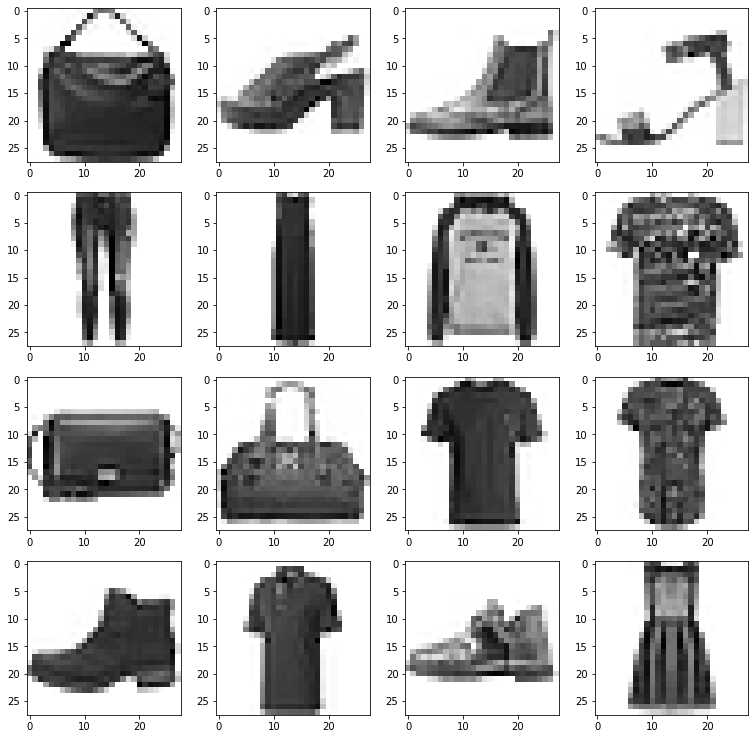

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize = (13, 13))

for i in range(4):
    for j in range(4):
        index = random.randint(0, train_images.shape[0] - 1)
        axs[i][j].imshow(train_images[index], cmap = 'binary')

In [12]:
# Normalizing the dataset
train_images = train_images / 255.
test_images = test_images / 255.

Of course, our past model won't function with this dataset, so let's create another one.

In [13]:
model = Sequential([
    Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation = 'softmax')
])

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(train_images[..., np.newaxis], train_labels, epochs = 8, batch_size = 256)

Epoch 1/8
235/235 [==============================] - 10s 40ms/step - loss: 0.8137 - accuracy: 0.7390
Epoch 2/8
235/235 [==============================] - 9s 39ms/step - loss: 0.4861 - accuracy: 0.8290
Epoch 3/8
235/235 [==============================] - 9s 40ms/step - loss: 0.4313 - accuracy: 0.8489
Epoch 4/8
235/235 [==============================] - 10s 42ms/step - loss: 0.4040 - accuracy: 0.8599
Epoch 5/8
235/235 [==============================] - 9s 39ms/step - loss: 0.3864 - accuracy: 0.8651
Epoch 6/8
235/235 [==============================] - 9s 39ms/step - loss: 0.3718 - accuracy: 0.8705
Epoch 7/8
235/235 [==============================] - 9s 39ms/step - loss: 0.3623 - accuracy: 0.8730
Epoch 8/8
235/235 [==============================] - 9s 40ms/step - loss: 0.3513 - accuracy: 0.8765


We can also take a look at the summary in the form of a data frame.

In [17]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,0.813743,0.738950
1,0.486114,0.829000
2,0.431332,0.848900
3,0.404003,0.859933
4,0.386445,0.865100


Now that we have the history in a data frame, we can access all the info. For example, we can get the loss to plot it!

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

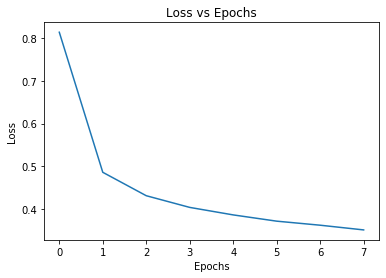

In [18]:
loss_plot = df.plot(y = 'loss', title = 'Loss vs Epochs', legend = False)
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')

Let's make a prediction.

True label: Sandal
Predicted label: Sandal


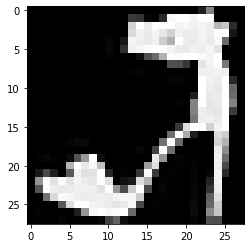

In [20]:
predictions = model.predict(test_images[..., np.newaxis])

index = random.randint(0, predictions.shape[0] - 1)
true_label = labels[test_labels[index]]
predicted_label = labels[np.argmax(predictions[index])]

print('True label: {}'.format(true_label))
print('Predicted label: {}'.format(predicted_label))
plt.imshow(test_images[index], cmap = 'gray')

We can also use the `.evaluate` to see summary using the test data set.

In [21]:
model.evaluate(test_images[..., np.newaxis], test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3944 - accuracy: 0.8615


[0.39435163140296936, 0.8615000247955322]